In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Loading the dataset

In [33]:
df = pd.read_csv("./data/StudentsPerformance.csv")

In [34]:
df.shape

(1000, 8)

In [35]:
df.dtypes

gender                         object
race/ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [36]:
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [113]:
## ¿En qué asignatura en promedio los estudiantes obtuvieron un mejor puntaje?
## la asignatura con el promedio mayor es "Lectura"

In [97]:
betterMath = df['math_score'].mean()
betterRead = df['reading_score'].mean()
betterWrite = df['writing_score'].mean()
scores = [betterMath, betterRead, betterWrite]
theme = ['Math','Read','Write']
themes = list(zip(theme,scores))
dfthemes = pd.DataFrame(data=themes,columns=['theme','score'])
print(dfthemes)
print('mayor promedio es: ' + str(dfthemes['score'].max()))

   theme   score
0   Math  66.089
1   Read  69.169
2  Write  68.054
mayor promedio es: 69.169


In [88]:
##¿Existe alguna correlación entre los puntajes obtenidos en las tres asignaturas?
## se mide la correlación por generos
## la correlación entre Matemáticas no tiene y lectura mantiene pendientes separadas de forma monotona.
## la correlación entre Mateméticas no tiene y escritura mantiene pendientes seperadas de forma monotona.
## la correlación entre Lectura y escritura es fuerte y sus pendientes son cercanas y de forma monotona.

In [105]:
set(df.gender)

{'female', 'male'}

In [104]:
colors = {'female': 'Crimson', 'male': 'RoyalBlue'}
gender_colors = df.gender.map(colors)

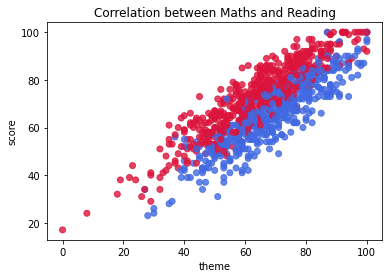

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.set_title("Correlation between Maths and Reading")
ax.scatter(x=df.math_score, y=df.reading_score, alpha= 0.8, color=gender_colors)
ax.set_xlabel('theme')
ax.set_ylabel('score')
plt.show()

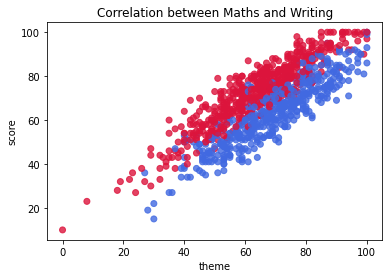

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.set_title('Correlation between Maths and Writing')
ax.scatter(x=df.math_score, y=df.writing_score, alpha= 0.8, color=gender_colors)
ax.set_xlabel('theme')
ax.set_ylabel('score')
plt.show()

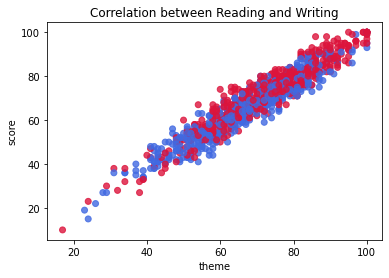

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.set_title('Correlation between Reading and Writing')
ax.scatter(x=df.reading_score, y=df.writing_score, alpha= 0.8, color=gender_colors)
ax.set_xlabel('theme')
ax.set_ylabel('score')
plt.show()

In [126]:
## ¿Hay alguna diferencia observable en los puntajes de la asignatura de matemáticas entre hombres y mujeres?
## Sí, Las mujeres tiene mayor puntajes
## ¿Quiénes, hombres o mujeres, tienen la mediana más alta para esta misma asignatura?
## la mediana en la calificación la sustenta los Hombre

In [127]:
medianGralGender = df[['gender','math_score']]
medianGralGender.groupby(['gender']).mean()
#medianGralGender

,math_score
gender,
female,63.633205
male,68.728216


Text(0.5, 0, 'gender')

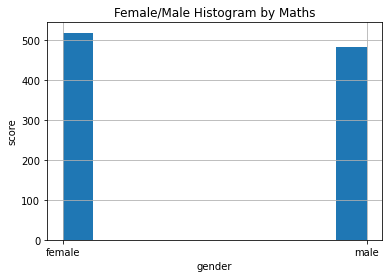

In [128]:
ax1 = df["gender"].hist()
ax1.set_title("Female/Male Histogram by Maths")
ax1.set_ylabel("score")
ax1.set_xlabel("gender")

In [129]:
## ¿Qué nivel de escolaridad tienen los padres de los estudiantes que obtuvieron un puntaje superior a 90 
## en la asignatura de escritura? Liste los niveles de escolaridad del más al menos frecuente

In [132]:
score_parents = df[['parental_level_of_education','writing_score']]
score_parents.head()

,parental_level_of_education,writing_score
0,bachelor's degree,74
1,some college,88
2,master's degree,93
3,associate's degree,44
4,some college,75


In [139]:
score_parents[score_parents['writing_score'] > 90]
score_parents.sort_values(['writing_score'], ascending=False)
score_parents.groupby(['parental_level_of_education']).agg(['count'])['writing_score']

,count
parental_level_of_education,
associate's degree,222
bachelor's degree,118
high school,196
master's degree,59
some college,226
some high school,179
